In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from pathlib import Path
import os
from datetime import datetime

In [2]:
final_customers_clean = pd.read_csv('final_customers_clean.csv')

In [3]:
final_fact_sales_clean = pd.read_csv('final_sales_clean_df.csv')

In [4]:
final_fact_sales_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24404 entries, 0 to 24403
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_date  24404 non-null  object 
 1   customer_id       24404 non-null  object 
 2   description       24404 non-null  object 
 3   stock_code        24404 non-null  object 
 4   invoice_no        24404 non-null  int64  
 5   quantity          24404 non-null  int64  
 6   sales             24404 non-null  float64
 7   unit_price        24404 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 1.5+ MB


In [5]:
final_fact_sales_clean.head()

,transaction_date,customer_id,description,stock_code,invoice_no,quantity,sales,unit_price
0,12/1/2020 8:26,17850,Dog and Puppy Pads,85123A,536365,1,15.30,15.30
1,12/1/2020 8:34,13047,Pet Odor Eliminator,84879,536367,6,60.84,10.14
2,12/1/2020 8:34,13047,Rechargeable Pet Nail Grinder,22960,536368,1,25.50,25.50
3,12/1/2020 9:00,13748,Litter Slide Multi-Cat Scented Clumping Clay C...,22086,536371,14,214.20,15.30
4,12/1/2020 9:02,17850,Dog and Puppy Pads,85123A,536373,1,15.30,15.30


In [6]:
products = pd.read_csv('products.csv')

In [7]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   stock_code               20 non-null     object 
 1   weight                   20 non-null     float64
 2   landed_cost              20 non-null     float64
 3   shipping_cost_1000_mile  20 non-null     float64
 4   description              20 non-null     object 
 5   category                 20 non-null     object 
dtypes: float64(3), object(3)
memory usage: 1.1+ KB


In [8]:
products.category.value_counts()

Food                6
Disposables         4
Grooming            4
Supplements         2
Electronics         2
Pet Food            1
Cleanig Supplies    1
Name: category, dtype: int64

## Number of transactions

In [9]:
final_fact_sales_clean.shape

(24404, 8)

In [39]:
final_fact_sales_clean.head()

,transaction_date,customer_id,description,stock_code,invoice_no,quantity,sales,unit_price
0,12/1/2020 8:26,17850,Dog and Puppy Pads,85123A,536365,1,15.30,15.30
1,12/1/2020 8:34,13047,Pet Odor Eliminator,84879,536367,6,60.84,10.14
2,12/1/2020 8:34,13047,Rechargeable Pet Nail Grinder,22960,536368,1,25.50,25.50
3,12/1/2020 9:00,13748,Litter Slide Multi-Cat Scented Clumping Clay C...,22086,536371,14,214.20,15.30
4,12/1/2020 9:02,17850,Dog and Puppy Pads,85123A,536373,1,15.30,15.30


### 24404 number of transactions

## Customers by state

In [21]:
customers_by_state=final_customers_clean.groupby(['state']).agg(customer_count=('customer_id', 'count'))

In [25]:
df_customers_by_state = customers_by_state.reset_index().sort_values('customer_count', ascending=False)

## Top 15 transactions from customers by state

In [27]:
top_15_states = df_customers_by_state.nlargest(15,'customer_count')

In [32]:
top_15_states

,customer_count
state,
CA,598
FL,343
NY,318
TX,292
IL,193
PA,181
NJ,163
WA,132
VA,131


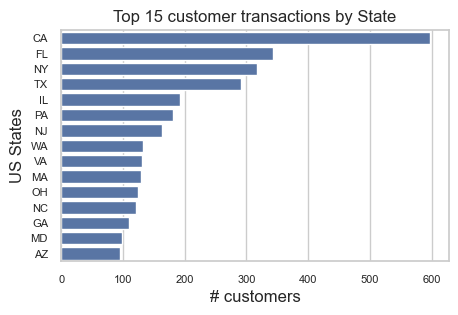

In [43]:
sns.set(rc={'figure.figsize':(5,3)},style="whitegrid")
g = sns.barplot(y=pd.Series(final_customers_clean['state'].value_counts().nlargest(15)).index, x=pd.Series(final_customers_clean['state'].value_counts().nlargest(15)).values,color='b')
g.set(xlabel='# customers', ylabel='US States')
plt.title('Top 15 customer transactions by State')
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
plt.show()

In [45]:
final_fact_sales_clean['stock_code'].value_counts()

85123A    2282
85099B    2098
22423     2003
47566     1690
20725     1568
84879     1468
22197     1401
22720     1390
23203     1232
22386     1220
22086     1167
23298     1153
22960     1133
23084     1014
23284      733
82484      685
79321      672
22114      649
22502      470
21137      376
Name: stock_code, dtype: int64

In [47]:
products['stock_code']

0      22423
1     85123A
2      47566
3     85099B
4      23084
5      22086
6      84879
7      79321
8      22502
9      22197
10     23298
11     22386
12     23203
13     21137
14     22720
15     23284
16     22960
17     82484
18     20725
19     22114
Name: stock_code, dtype: object

In [48]:
final_customers_clean.head()

,customer_id,order_city,order_postal,order_state,latitude,longitude,state,region
0,18287,Rock Springs,82901-7321,WY,41.5869,-109.2048,WY,West
1,18283,JACKSON,83001-9460,WY,43.4800,-110.7618,WY,West
2,18282,Greybull,82426,WY,44.4892,-108.0562,WY,West
3,18281,EVANSTON,82930-4706,WY,41.2680,-110.9633,WY,West
4,18280,CHEYENNE,82001-7901,WY,41.1400,-104.8202,WY,West


In [49]:
final_customers_clean['order_city'].unique()

array(['Rock Springs', 'JACKSON', 'Greybull', ..., 'Groton', 'Tempe',
       'Avondale'], dtype=object)

In [73]:

# converting and overwriting values in column
final_customers_clean["city"]= list(map(lambda x: x.title(), list(final_customers_clean['order_city'])))

In [71]:
final_customers_clean["city_lambda"] = list(map(lambda x: x.title(), list(final_customers_clean['order_city'])))

In [75]:
final_customers_clean.drop(['city_lambda'], axis=1,inplace=True)

In [76]:
final_customers_clean.head()

,customer_id,order_city,order_postal,order_state,latitude,longitude,state,region,city,zip
0,18287,Rock Springs,82901-7321,WY,41.5869,-109.2048,WY,West,Rock Springs,82901
1,18283,JACKSON,83001-9460,WY,43.4800,-110.7618,WY,West,Jackson,83001
2,18282,Greybull,82426,WY,44.4892,-108.0562,WY,West,Greybull,82426
3,18281,EVANSTON,82930-4706,WY,41.2680,-110.9633,WY,West,Evanston,82930
4,18280,CHEYENNE,82001-7901,WY,41.1400,-104.8202,WY,West,Cheyenne,82001


In [52]:
final_customers_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customer_id   4372 non-null   int64  
 1   order_city    4372 non-null   object 
 2   order_postal  4372 non-null   object 
 3   order_state   4372 non-null   object 
 4   latitude      4274 non-null   float64
 5   longitude     4274 non-null   float64
 6   state         4372 non-null   object 
 7   region        4350 non-null   object 
 8   city          4372 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 307.5+ KB


In [54]:
final_customers_clean['zip'] = final_customers_clean['order_postal'].str.extract('^([^-]*)-')

In [77]:
final_customers_clean['zip_code'] = [i[:5] if '-' in i else i for i in list(final_customers_clean['order_postal'])]

In [78]:
final_customers_clean.head()

,customer_id,order_city,order_postal,order_state,latitude,longitude,state,region,city,zip,zip_code
0,18287,Rock Springs,82901-7321,WY,41.5869,-109.2048,WY,West,Rock Springs,82901,82901
1,18283,JACKSON,83001-9460,WY,43.4800,-110.7618,WY,West,Jackson,83001,83001
2,18282,Greybull,82426,WY,44.4892,-108.0562,WY,West,Greybull,82426,82426
3,18281,EVANSTON,82930-4706,WY,41.2680,-110.9633,WY,West,Evanston,82930,82930
4,18280,CHEYENNE,82001-7901,WY,41.1400,-104.8202,WY,West,Cheyenne,82001,82001


In [79]:
final_customers_clean.drop(['zip'], axis=1,inplace=True)

In [80]:
final_customers_clean.head()

,customer_id,order_city,order_postal,order_state,latitude,longitude,state,region,city,zip_code
0,18287,Rock Springs,82901-7321,WY,41.5869,-109.2048,WY,West,Rock Springs,82901
1,18283,JACKSON,83001-9460,WY,43.4800,-110.7618,WY,West,Jackson,83001
2,18282,Greybull,82426,WY,44.4892,-108.0562,WY,West,Greybull,82426
3,18281,EVANSTON,82930-4706,WY,41.2680,-110.9633,WY,West,Evanston,82930
4,18280,CHEYENNE,82001-7901,WY,41.1400,-104.8202,WY,West,Cheyenne,82001


In [81]:
final_customers_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customer_id   4372 non-null   int64  
 1   order_city    4372 non-null   object 
 2   order_postal  4372 non-null   object 
 3   order_state   4372 non-null   object 
 4   latitude      4274 non-null   float64
 5   longitude     4274 non-null   float64
 6   state         4372 non-null   object 
 7   region        4350 non-null   object 
 8   city          4372 non-null   object 
 9   zip_code      4372 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 341.7+ KB


In [82]:
#saving this file
csv_name = "df_final_customers_clean.csv"
final_customers_clean.to_csv(csv_name, index=False)